<a href="https://colab.research.google.com/github/Wael8787/Machine-Learning/blob/main/03_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns

Data

In [149]:
df = pd.read_csv('pressure.csv')

In [150]:
df.head()

,sno,Temp,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [151]:
df.tail()

,sno,Temp,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [152]:
df.describe()

,sno,Temp,Pressure
count,6.000000,6.000000,6.000000
mean,3.500000,50.000000,0.066233
std,1.870829,37.416574,0.105467
min,1.000000,0.000000,0.000200
25%,2.250000,25.000000,0.002400
50%,3.500000,50.000000,0.018000
75%,4.750000,75.000000,0.075000
max,6.000000,100.000000,0.270000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       6 non-null      int64  
 1   Temp      6 non-null      int64  
 2   Pressure  6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


Data plot

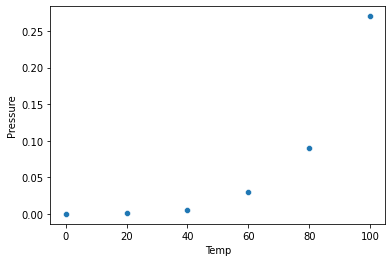

In [154]:
sns.scatterplot(data=df, x="Temp", y="Pressure")

In [190]:
X = df[['Temp']]
X

,Temp
0,0
1,20
2,40
3,60
4,80
5,100


In [191]:
y = df['Pressure']
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

Train test

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Simple linear results

In [193]:
from sklearn import  linear_model
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

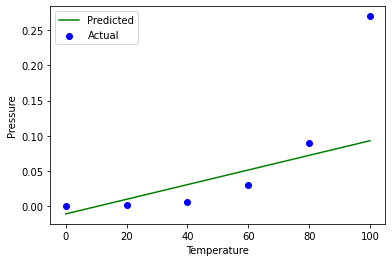

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y, c='b')
plt.plot(X, regr.predict(X), c='g')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Predicted', 'Actual']) 
plt.show()

In [195]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, regr.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, regr.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, regr.predict(X))))

Mean Absolute Error: 0.10074
Mean Squared Error: 0.0159839797
Root Mean Squared Error: 0.12642776475126025


Polynomial fit

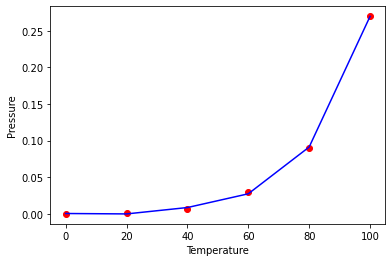

In [198]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.xlabel('Temperature')
    plt.ylabel('Pressure')
    plt.show()
    return
viz_polymonial()

In [200]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, regr.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, regr.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, regr.predict(X))))

Mean Absolute Error: 0.04341333333333333
Mean Squared Error: 0.005490315566666667
Root Mean Squared Error: 0.07409666366758133
